In [1]:
import numpy as np
import matplotlib.pyplot as plt
from synth_mirnov import synthetic_mirnov as sm
import pickle
import vmec_library as vl

In [2]:
with open("./booz_pickles/booz_TJII.pkl", "rb") as tfile:
    booz = pickle.load(tfile)

In [3]:
sm.init_booz(
    s_b=booz.s,
    th_b=booz.th,
    ph_b=booz.ph,
    b_mod_b=booz.vars["mod_b"],
    sqrt_g_b=booz.vars["sqrtg_vecs"],
    phi_b_g=booz.woutdata["phi_b"][-1],
    iota_b=booz.iota,
    x=booz.xyzs["xs"],
    y=booz.xyzs["ys"],
    z=booz.xyzs["zs"],
)

 PLANS                    0                    0
 PLANS       94102308107968       94102309730400


In [8]:
th = booz.th
ph = booz.ph

phph, thth = np.meshgrid(ph, th)

g = [np.sin(2*thth + 3*phph) for i in range(len(booz.s))]
g = np.array(g)

dgds = np.zeros((len(booz.s), len(th), len(ph)))
dgdth = [2*np.cos(2*thth + 3*phph) for i in range(len(booz.s))]
dgdph = [3*np.cos(2*thth + 3*phph) for i in range(len(booz.s))]
grad_an = np.moveaxis(np.array([dgds, dgdth, dgdph]), 0, -1)

In [9]:
grad = sm.test_gradient(g)

         140         128         256
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
         128         256
        (-3.03854164052097531E-014,0.0000000000000000)
   

In [10]:
np.all(np.isclose(grad, grad_an))

True

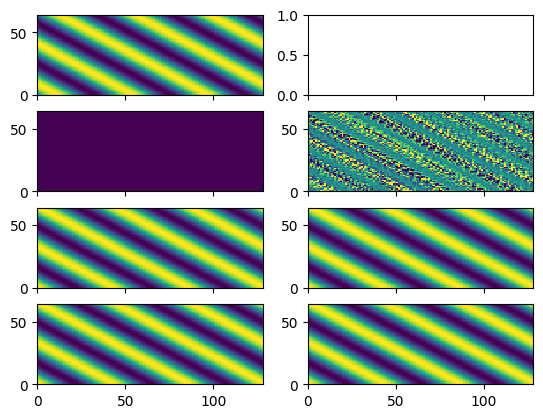

In [7]:
fig, ax = plt.subplots(4,2,sharex=True)
ax[0, 0].pcolorfast(g[0])
ax[1, 0].pcolorfast(grad_an[0][0])
ax[2, 0].pcolorfast(grad_an[1][0])
ax[3, 0].pcolorfast(grad_an[2][0])
ax[1, 1].pcolorfast(grad[0][0])
ax[2, 1].pcolorfast(grad[1][0])
ax[3, 1].pcolorfast(grad[2][0])

In [14]:
grad[1]

array([[[2.        , 1.97835302, 1.91388067, ..., 1.80797859,
         1.91388067, 1.97835302],
        [1.96157056, 1.88308813, 1.76384253, ..., 1.94006251,
         1.99036945, 1.99759091],
        [1.84775907, 1.71545722, 1.54602091, ..., 1.99759091,
         1.99036945, 1.94006251],
        ...,
        [1.66293922, 1.80797859, 1.91388067, ..., 1.02820549,
         1.26878657, 1.48190225],
        [1.84775907, 1.94006251, 1.99036945, ..., 1.34311791,
         1.54602091, 1.71545722],
        [1.96157056, 1.99759091, 1.99036945, ..., 1.60641506,
         1.76384253, 1.88308813]],

       [[2.        , 1.97835302, 1.91388067, ..., 1.80797859,
         1.91388067, 1.97835302],
        [1.96157056, 1.88308813, 1.76384253, ..., 1.94006251,
         1.99036945, 1.99759091],
        [1.84775907, 1.71545722, 1.54602091, ..., 1.99759091,
         1.99036945, 1.94006251],
        ...,
        [1.66293922, 1.80797859, 1.91388067, ..., 1.02820549,
         1.26878657, 1.48190225],
        [1.8

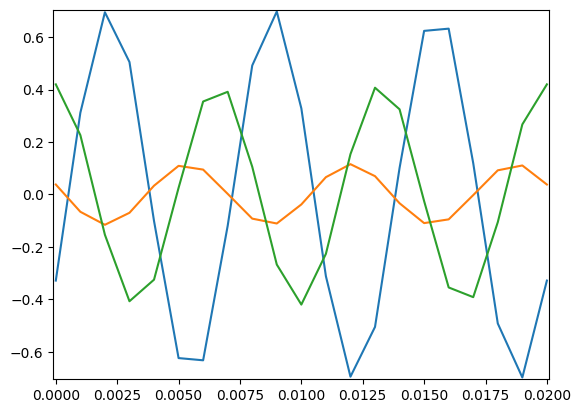

In [43]:
w = 150*2*np.pi
t = np.linspace(0,0.02, 21)
a = np.random.rand(3)*np.exp(1j*2*np.pi*np.random.rand(3))
at = a.reshape(-1,1) * np.exp(-1j*w*t)
plt.plot(t, np.real(at).T)

In [12]:
a * np.exp(-1j*w*t)

ValueError: operands could not be broadcast together with shapes (3,) (21,) 

In [17]:
at = a.reshape(-1,1) * np.exp(-1j*w*t)

In [18]:
at

array([[ 4.90174496e-01+2.64713830e-01j,  5.02275327e-01-2.40964613e-01j,
         1.00285563e-01-5.47984721e-01j, -3.84382577e-01-4.03230062e-01j,
        -5.52154383e-01+7.39593533e-02j, -2.64713830e-01+4.90174496e-01j,
         2.40964613e-01+5.02275327e-01j,  5.47984721e-01+1.00285563e-01j,
         4.03230062e-01-3.84382577e-01j, -7.39593533e-02-5.52154383e-01j,
        -4.90174496e-01-2.64713830e-01j, -5.02275327e-01+2.40964613e-01j,
        -1.00285563e-01+5.47984721e-01j,  3.84382577e-01+4.03230062e-01j,
         5.52154383e-01-7.39593533e-02j,  2.64713830e-01-4.90174496e-01j,
        -2.40964613e-01-5.02275327e-01j, -5.47984721e-01-1.00285563e-01j,
        -4.03230062e-01+3.84382577e-01j,  7.39593533e-02+5.52154383e-01j,
         4.90174496e-01+2.64713830e-01j],
       [ 5.25417795e-01+4.42069635e-01j,  6.66474679e-01-1.65229913e-01j,
         2.58070179e-01-6.36309048e-01j, -3.63094988e-01-5.82796235e-01j,
        -6.84913938e-01-4.88090164e-02j, -4.42069635e-01+5.25417795e-0

In [10]:
import numpy as np

np.random.seed(42)

a = np.random.rand(3, 4, 5, 6)
b = a.swapaxes(0, -1)

In [11]:
b[3,2,1] == a[1,2,3]

ValueError: operands could not be broadcast together with shapes (3,) (6,) 

In [16]:
a.shape, a.T.shape

((3, 4, 5, 6), (6, 5, 4, 3))

In [18]:
b = np.moveaxis(a, 0, -1)

In [19]:
b.shape

(4, 5, 6, 3)